<a href="https://colab.research.google.com/github/Nisasoylu/Agenda-Android/blob/main/Models_Self_Study_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())
directory_path = "/content/drive/My Drive/KU/Self Study"

files = os.listdir(directory_path)
print("Files in the directory:")
for file in files:
    print(file)

Mounted at /content/drive
/content
Files in the directory:
cnn_data
iris_nn_model.pt
Models_Self_Study_Pytorch.ipynb


In [2]:
%cd /content/drive/My Drive/KU/Self Study

/content/drive/My Drive/KU/Self Study


In [3]:
ls

cnn_data/  iris_nn_model.pt  Models_Self_Study_Pytorch.ipynb


# Into Part

In [4]:
import torch
import numpy as np

In [5]:
# Bu kod ile Google Colab'de yüklü olan kütphaneleri görürüz:
# !pip list

NumPy ndarray sadece CPU'da çalışan bir çok boyutlu dizi nesnesiyken, PyTorch Tensor hem CPU hem de GPU üzerinde çalışabilir, otomatik türev alabilir ve derin öğrenme için optimize edilmiştir.

Numpy datatype'ı float64 iken, Tensor datatype ı float32 dir. Bu da aslında daha hızlı çalışmasına olanak sağlar.

In [6]:
my_list = np.random.rand(3,4)
my_list

array([[0.87196282, 0.97351331, 0.4590445 , 0.2079906 ],
       [0.20795507, 0.42139308, 0.16499129, 0.54726965],
       [0.91317603, 0.26493439, 0.02302437, 0.63586771]])

In [7]:
tensor_2d = torch.rand(3,4)
tensor_2d

tensor([[0.1659, 0.4415, 0.7890, 0.6132],
        [0.9367, 0.7725, 0.7860, 0.3616],
        [0.4405, 0.1129, 0.7346, 0.7963]])

"rand" 0 ile 1 arasında sayılar üretir. Eğer Gaussian dağılıma sahip sayılar üretmek istersek "randn" kullanırız.

In [8]:
 tensor_3d = torch.rand(2,3,4)
 tensor_3d

tensor([[[0.6488, 0.2304, 0.1034, 0.5999],
         [0.5929, 0.8303, 0.4089, 0.3733],
         [0.7864, 0.5867, 0.3816, 0.4439]],

        [[0.0493, 0.7083, 0.8236, 0.6878],
         [0.8781, 0.6746, 0.3307, 0.5749],
         [0.1013, 0.5522, 0.7751, 0.6110]]])

In [9]:
my_list.dtype

dtype('float64')

In [10]:
my_list_tensor = torch.tensor(my_list)
my_list_tensor

tensor([[0.8720, 0.9735, 0.4590, 0.2080],
        [0.2080, 0.4214, 0.1650, 0.5473],
        [0.9132, 0.2649, 0.0230, 0.6359]], dtype=torch.float64)

In [11]:
my_list_tensor.dtype # Numpy array default olarak float64 olduğu için, tensor a çevirsek bile dtype değişmedi.

torch.float64

In [12]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
my_torch.reshape(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [14]:
my_torch2 = torch.arange(10,20)
my_torch2

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Diyelim ki tensor'un shape'ini bilmiyoruz o zaman satır sayısını yazıp, sütun sayısını kendi belirlesin diye -1 verebiliriz. (Aynı şeyi satır sayısına -1 verip sutun sayısını vererek de yapabilirz.)

In [15]:
my_torch2.reshape(5,-1)

tensor([[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]])

"shape" ve "view" çok benzer.

In [16]:
my_torch2.view(5,-1)

tensor([[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]])

In [17]:
my_torch2

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

"view" ve "reshape" kullanarak tensor shape'ini de değiştirebiliriz.

In [18]:
 my_torch2 = my_torch2.reshape(5,2)
 my_torch2

tensor([[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]])

In [19]:
my_torch2[:, 1]

tensor([11, 13, 15, 17, 19])

In [20]:
torch1 = torch.arange(6)
torch2 = torch.arange(6,12)
torch1, torch2

(tensor([0, 1, 2, 3, 4, 5]), tensor([ 6,  7,  8,  9, 10, 11]))

In [21]:
print(torch.add(torch1, torch2))
print(torch.subtract(torch1, torch2))
print(torch.mul(torch1, torch2))
print(torch.div(torch1, torch2))

tensor([ 6,  8, 10, 12, 14, 16])
tensor([-6, -6, -6, -6, -6, -6])
tensor([ 0,  7, 16, 27, 40, 55])
tensor([0.0000, 0.1429, 0.2500, 0.3333, 0.4000, 0.4545])


# Nesne Tabanlı Programlama Örnek

In [22]:
class Araba:
    def __init__(self, marka, model, yil):
        self.marka = marka  # Arabanın markası
        self.model = model  # Arabanın modeli
        self.yil = yil  # Arabanın üretim yılı

    def bilgi_goster(self):
        return f"Bu araba {self.yil} model {self.marka} {self.model}."

# Araba sınıfından bir nesne (örnek) oluşturalım
araba1 = Araba("Toyota", "Corolla", 2020)
print(araba1.bilgi_goster())

Bu araba 2020 model Toyota Corolla.


In [23]:
class ElektrikliAraba(Araba):
    def __init__(self, marka, model, yil, batarya_kapasitesi):
        super().__init__(marka, model, yil)
        self.batarya_kapasitesi = batarya_kapasitesi
        self.sarj_seviyesi = 0  # Başlangıçta batarya boş

    def sarj_durumu(self):
        return f"Bu {self.marka} {self.model}, {self.batarya_kapasitesi} kWh bataryaya sahip ve {self.sarj_seviyesi}% dolu."

    def sarj_et(self, miktar):
        if self.sarj_seviyesi + miktar > 100:
            self.sarj_seviyesi = 100
        else:
            self.sarj_seviyesi += miktar
        return f"Batarya {self.sarj_seviyesi}% dolu."

# Yeni bir elektrikli araba oluşturalım:
tesla = ElektrikliAraba("Tesla", "Model 3", 2023, 75)

print(tesla.bilgi_goster())  # Araba sınıfından miras alınan metod
print(tesla.sarj_durumu())   # Batarya seviyesi 0%

# Arabayı şarj edelim
print(tesla.sarj_et(50))  # Batarya 50% dolu
print(tesla.sarj_et(60))  # Batarya 100% dolu (maksimum!)

Bu araba 2023 model Tesla Model 3.
Bu Tesla Model 3, 75 kWh bataryaya sahip ve 0% dolu.
Batarya 50% dolu.
Batarya 100% dolu.


-----
- **Package (Folder)**: Bir klasördür. İçinde Python modülleri (yani .py dosyaları) veya başka paketler bulunabilir.
- Bir klasörün Python paketi olması için içinde __init__.py dosyası olmalıdır!
-----
- **Modül (File)**: .py uzantılı bir file'dır mesela. İçinde foksiyonlar, sınıflar veya değişkenler bulunabilir.
-----
- **Class**: Objenin nasıl oluşturulacağını ve davranacağını tanımlayan bir şablondur. Modüllerin içinde bulunur.
-----

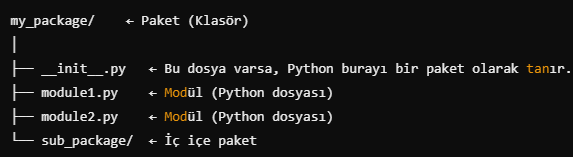

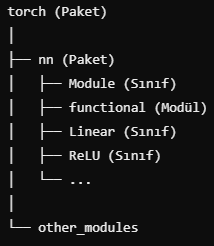

------
📌1️⃣ from A import B
- A bir paket (package) veya modül (module) olabilir.
- B bir sınıf (class), fonksiyon (function) veya değişken (variable) olabilir.
-------
from math import sqrt
- print(sqrt(16))
- math bir modüldür, sqrt bir fonksiyondur.
-------
from torch.nn import Module
- Burda hem torch hem de torch.nn birer pakettir (package), yani klasördür!
- Module de Class'dır.

❌ Eğer şu şekilde yazsaydık:

- import torch.nn
- model = torch.nn.Module()  
- HATA! Çünkü `torch.nn` bir paket, doğrudan çağrılamaz!

✅ Bunun yerine:

- import torch.nn as nn
- model = nn.Module()

-----
-----
📌 2️⃣ import C.D as P
- C bir package olabilir.
- D bir subpackage veya module olabilir.
- Sonunda as P kullanarak takma ad (alias) verdik.
-----
import torch.nn as nn
- torch bir paket
- torch.nn bir subpackage
- as nn dediğimiz için artık torch.nn.Module yerine nn.Module yazabiliriz.
-----
import torch.nn.functional as F
- torch package
- nn subpackge
- functional module
- F alias.
- Artık torch.nn.functional.relu(x) yerine F.relu(x) yazabiliriz.
-----
-----

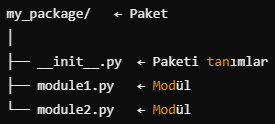

Diyelim ki yukardaki gibi bir yapı var:
- import my_package.module1
- from my_package.module1 import my_function
- from my_package.module2 import MyClass
- from my_package.module1 import *  
- (Bu, module1 içindeki tüm fonksiyonları ve sınıfları alır.
🚨 Ancak bu yöntem tavsiye edilmez, çünkü hangi fonksiyonun nereden geldiğini bilemeyiz!)
------
------

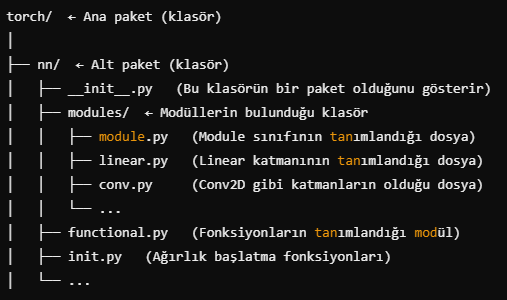

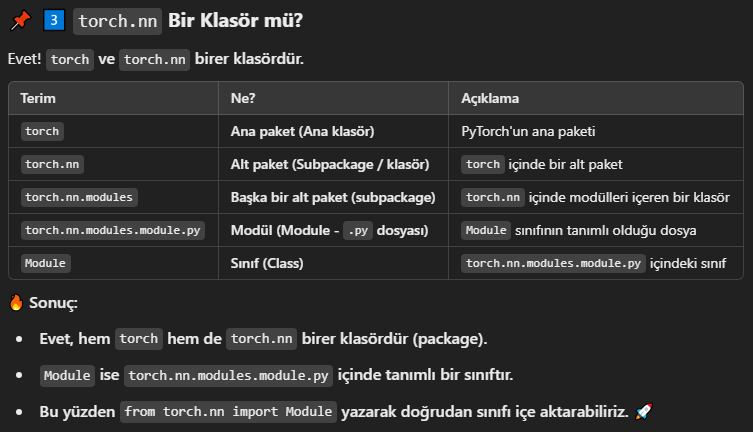

-----
-----
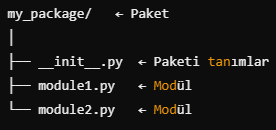

- from my_package import module1  # ✅ Paket içindeki bir modülü içe aktarıyoruz
- from my_package.module1 import my_function  # ✅ Modül içindeki bir fonksiyonu içe aktarıyoruz
- import my_function  # ❌ Hata! Çünkü module1 bir modül ve bulunduğu dizinde değilse çağrılamaz.

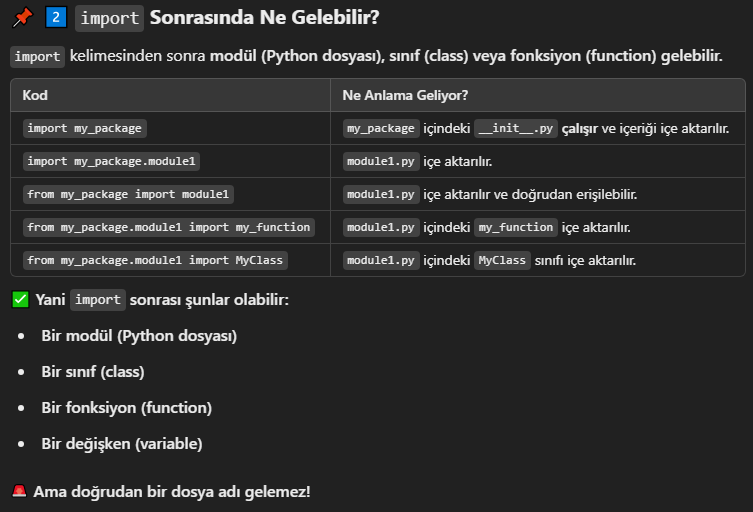

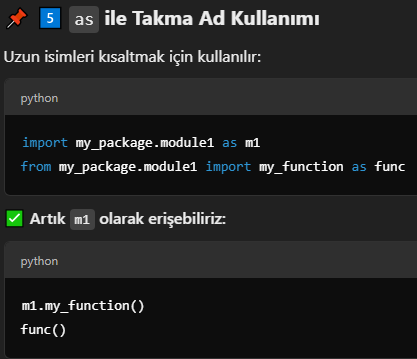

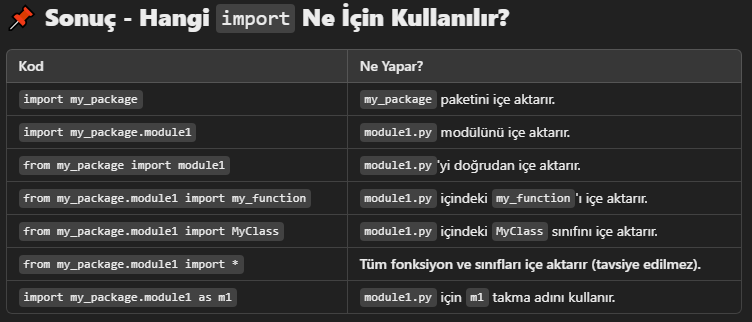

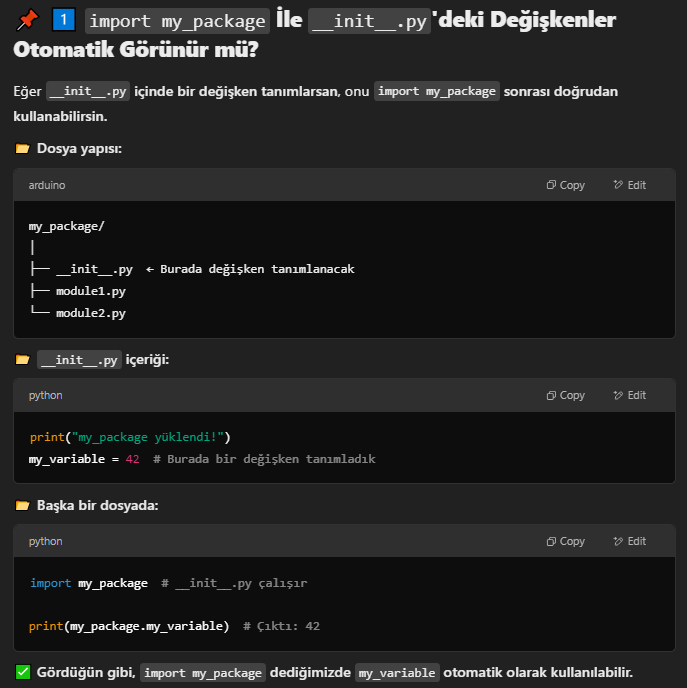

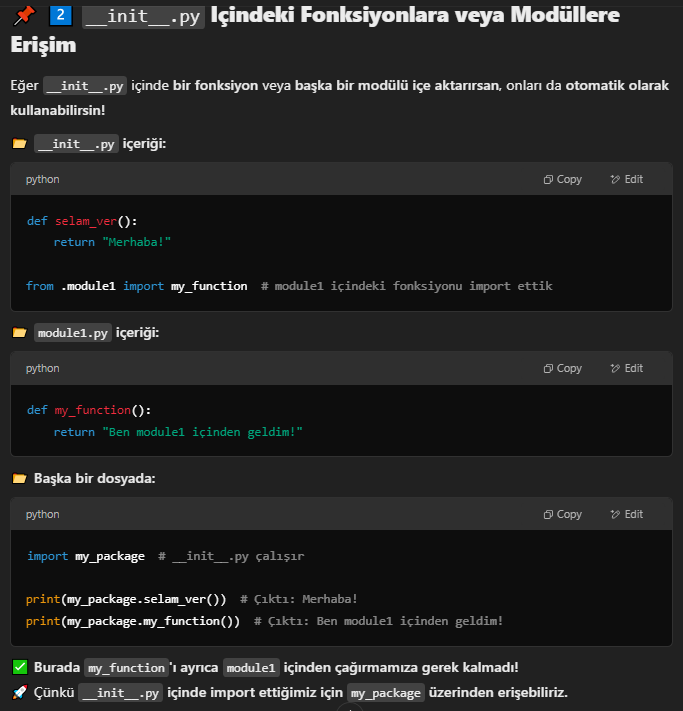

- Nokta (.), Python'da "relative import" (göreceli içe aktarma) yapıldığını gösterir.
- Bu, aynı paket içinde başka bir modülü çağırmak için kullanılır.

# Pytorch Hiyerarşik Yapısı

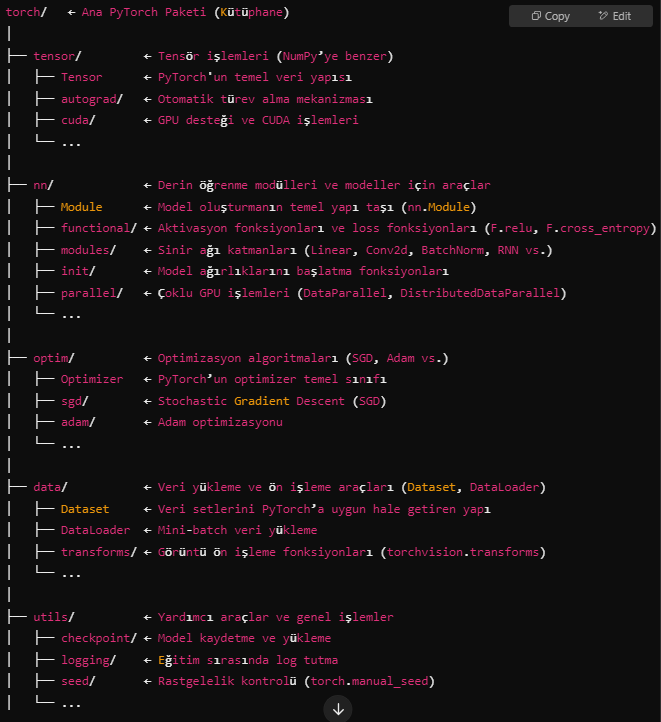

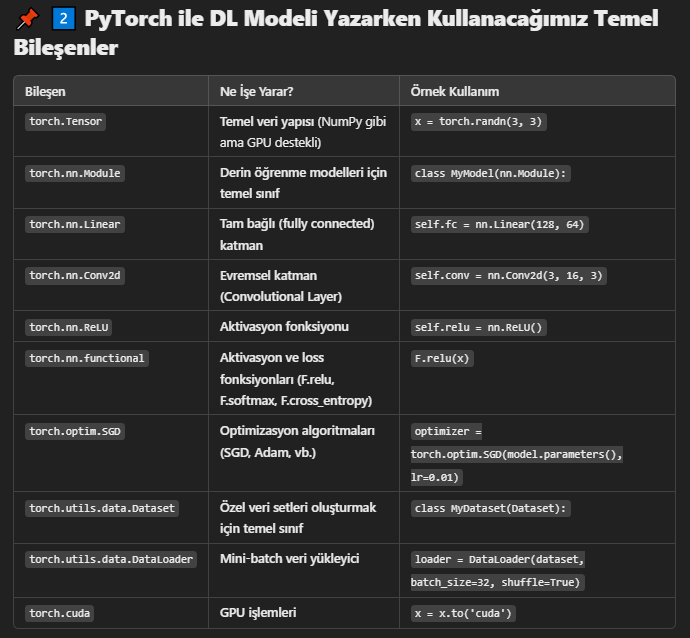

- 1️⃣ Veri yükleme (torch.utils.data.Dataset, DataLoader)
- 2️⃣ Model oluşturma (torch.nn.Module)
- 3️⃣ İleri besleme (forward) hesaplama (torch.nn.Linear, torch.nn.Conv2d, F.relu vs.)
- 4️⃣ Kayıp fonksiyonu ve optimizasyon (torch.nn.CrossEntropyLoss, torch.optim.SGD)
- 5️⃣ Eğitim döngüsü (torch.autograd)
- 6️⃣ GPU kullanımı (torch.cuda)

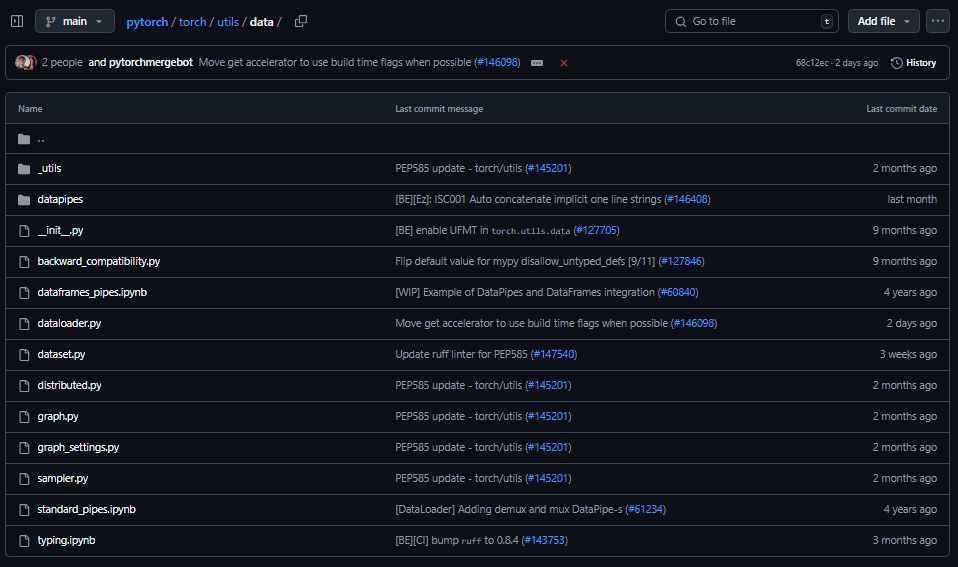

Normalde şöyle yazmamız gerekirdi:

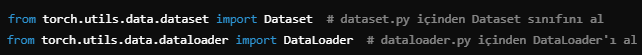

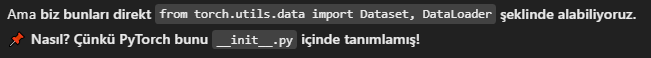

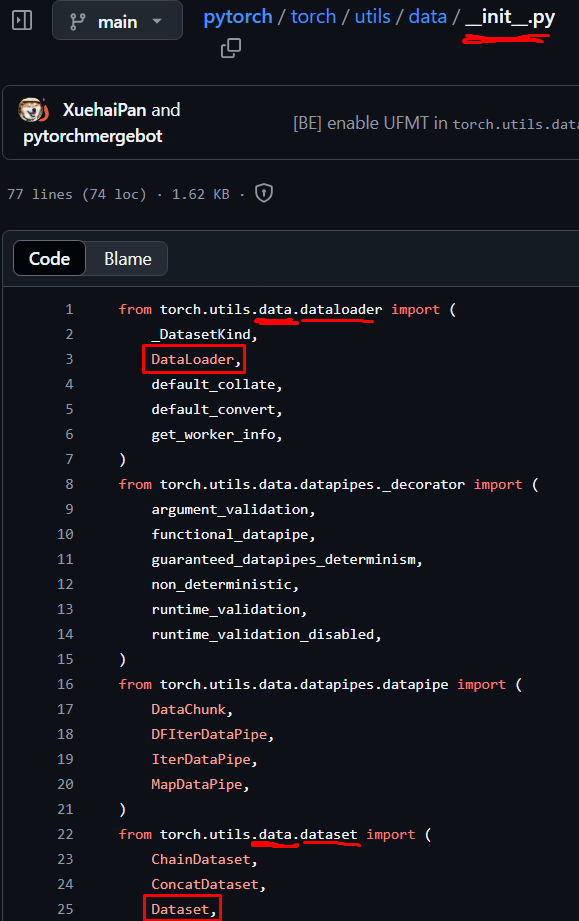

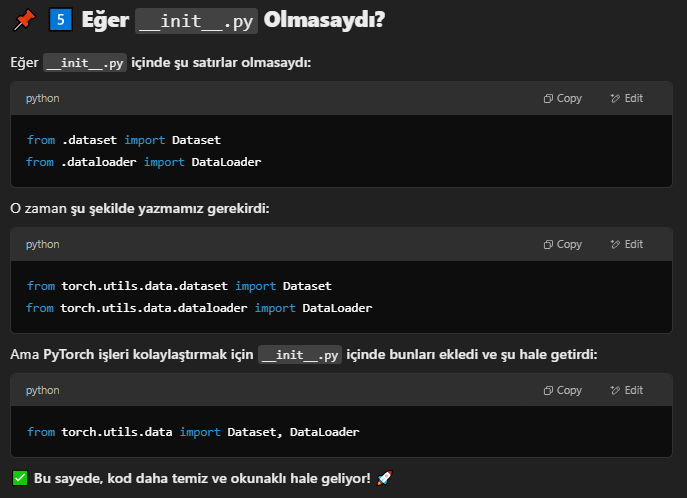

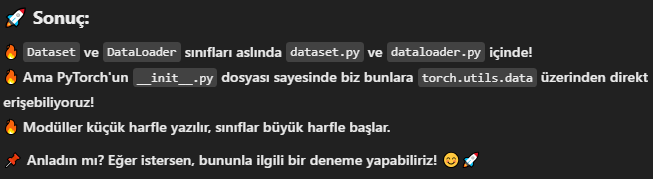

# Extra

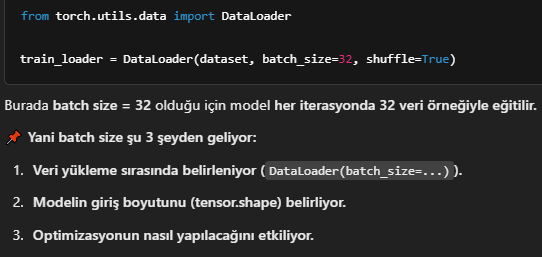

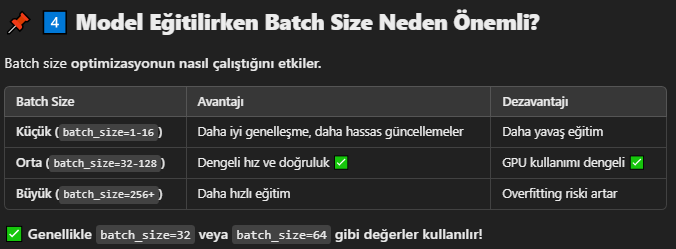

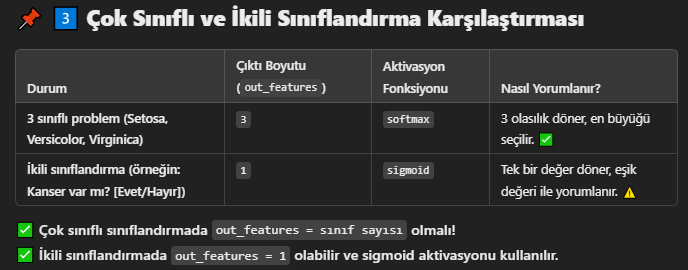

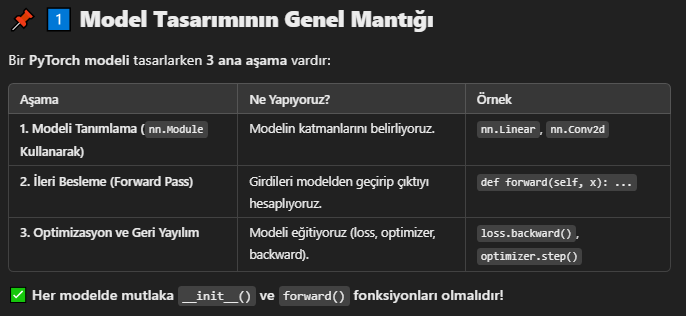

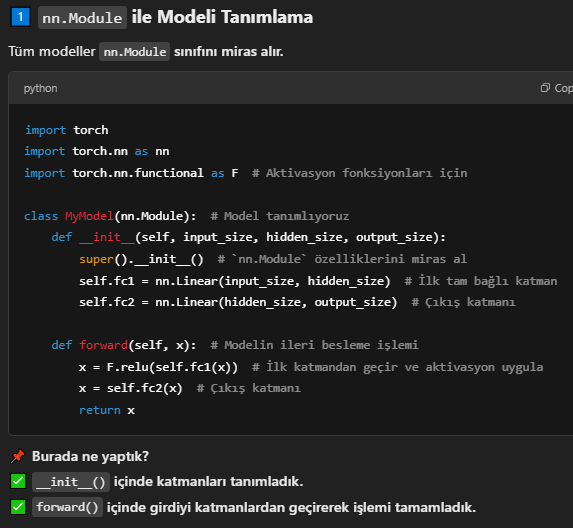

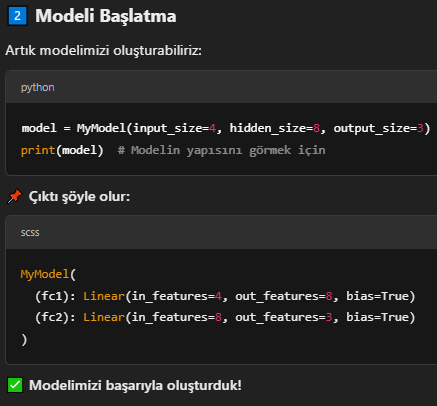

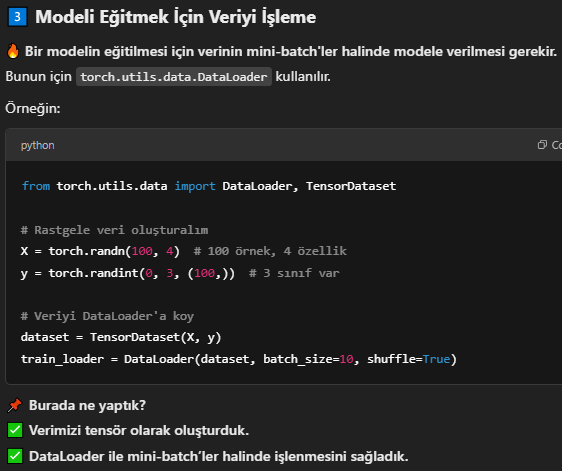

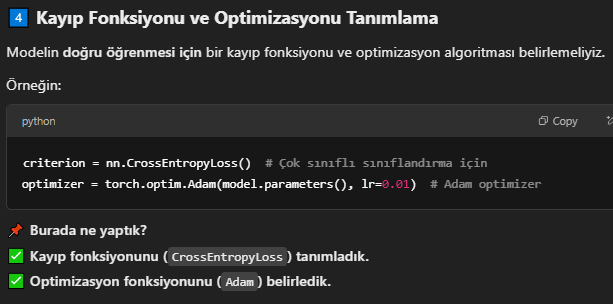

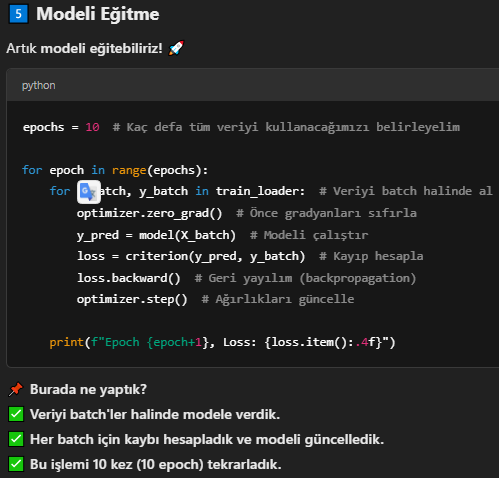

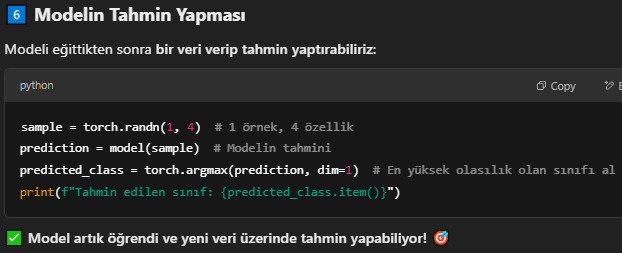

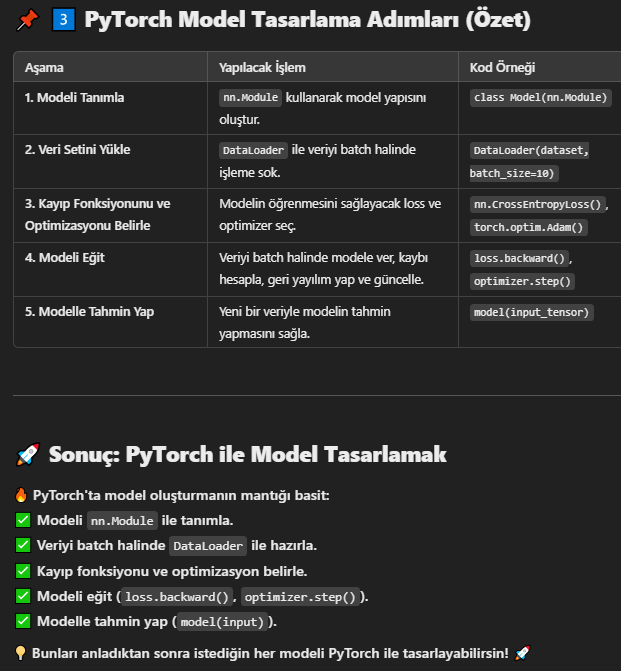

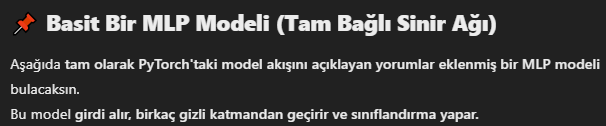

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# **1️⃣ Model Tanımlama**
class MLPModel(nn.Module):  # PyTorch'ta her model `nn.Module`'den türetilir. ********
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()  # `nn.Module`'ün iç özelliklerini miras alır.
        self.fc1 = nn.Linear(input_size, hidden_size)  # İlk tam bağlı katman
        self.fc2 = nn.Linear(hidden_size, output_size)  # Çıkış katmanı

    def forward(self, x):  # Modelin ileri besleme fonksiyonu
        x = F.relu(self.fc1(x))  # İlk katmandan geçir ve ReLU uygula
        x = self.fc2(x)  # Çıkış katmanı
        return x  # Modelin tahmini

# **2️⃣ Modeli Oluşturma**
input_size = 4  # 4 özellikli veri (örneğin iris dataset)
hidden_size = 8  # Gizli katmanda 8 nöron
output_size = 3  # 3 sınıflı sınıflandırma (Setosa, Versicolor, Virginica)

model = MLPModel(input_size, hidden_size, output_size)  # Model oluşturuldu

# **3️⃣ Veri Seti Oluşturma**
X = torch.randn(100, input_size)  # 100 örnek, 4 özellik
y = torch.randint(0, output_size, (100,))  # 3 sınıftan rastgele etiketler

dataset = TensorDataset(X, y)  # PyTorch için veri seti objesi oluşturduk
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)  # Mini-batch yükleyici

# **4️⃣ Kayıp Fonksiyonu ve Optimizatör**
criterion = nn.CrossEntropyLoss()  # Çok sınıflı sınıflandırma için uygun loss fonksiyonu
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam optimizasyonu

# **5️⃣ Model Eğitimi**
epochs = 5  # Modeli 5 defa tüm veri seti üzerinden eğiteceğiz

for epoch in range(epochs):
    for X_batch, y_batch in train_loader:  # Mini-batch olarak veriyi al
        optimizer.zero_grad()  # Önce gradyanları sıfırla
        y_pred = model(X_batch)  # Modelin tahmini
        loss = criterion(y_pred, y_batch)  # Kayıp hesapla
        loss.backward()  # Geri yayılım (backpropagation)
        optimizer.step()  # Model ağırlıklarını güncelle

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")  # Her epoch sonunda loss'u yazdır

# **6️⃣ Modeli Test Etme**
sample = torch.randn(20, input_size)  # Rastgele bir test örneği
prediction = model(sample)  # Modelin tahmini
predicted_class = torch.argmax(prediction, dim=1)  # En yüksek olasılığı olan sınıfı seç
print(f"Tahmin edilen sınıf: {predicted_class.tolist()}")

Epoch 1, Loss: 1.0834
Epoch 2, Loss: 1.0598
Epoch 3, Loss: 1.1393
Epoch 4, Loss: 1.0700
Epoch 5, Loss: 1.1903
Tahmin edilen sınıf: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


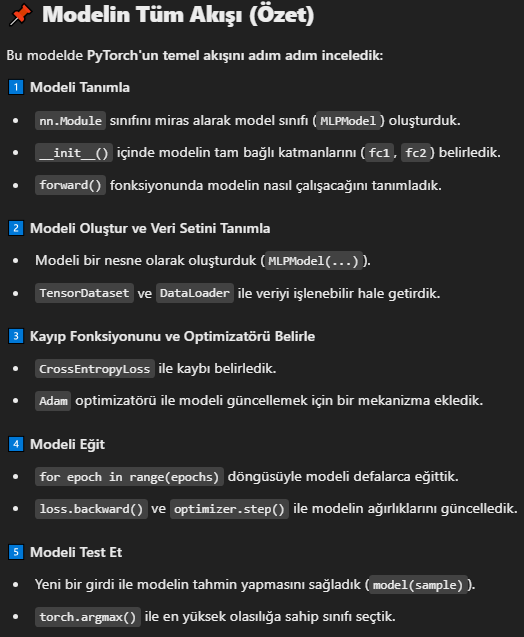

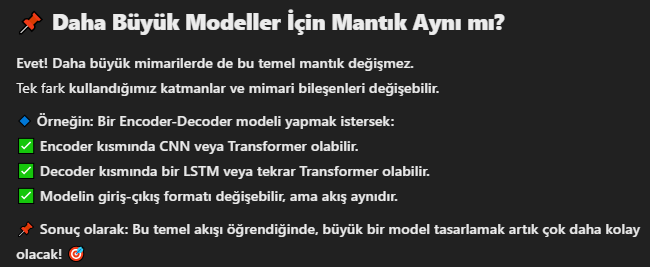

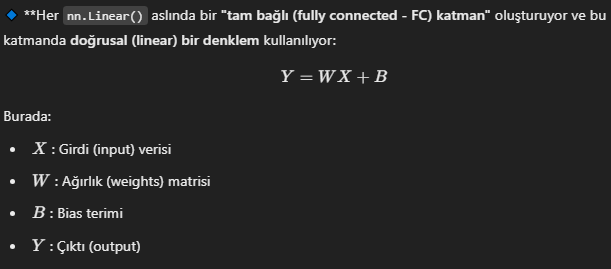

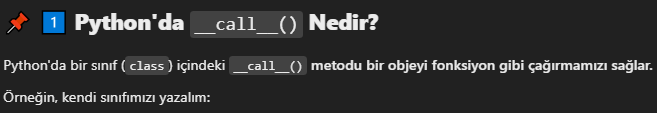

In [25]:
class MyClass:
    def __init__(self, name):
        self.name = name

    def __call__(self, greeting):
        return f"{greeting}, {self.name}!"

# Bir obje oluşturalım
obj = MyClass("Nisa")

# Şimdi objeyi fonksiyon gibi çağıralım!
print(obj("Merhaba"))  # ÇIKTI: Merhaba, Nisa!

print(obj.__call__("Merhaba"))

Merhaba, Nisa!
Merhaba, Nisa!


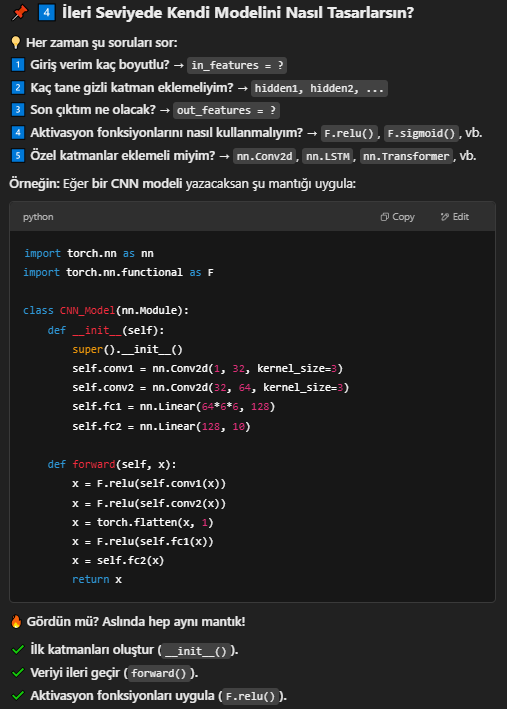

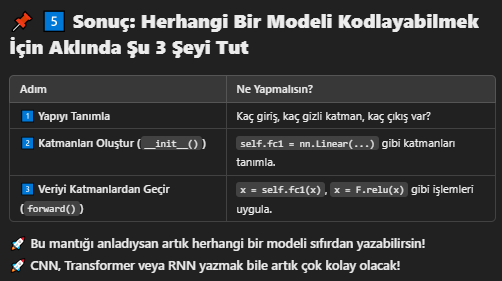

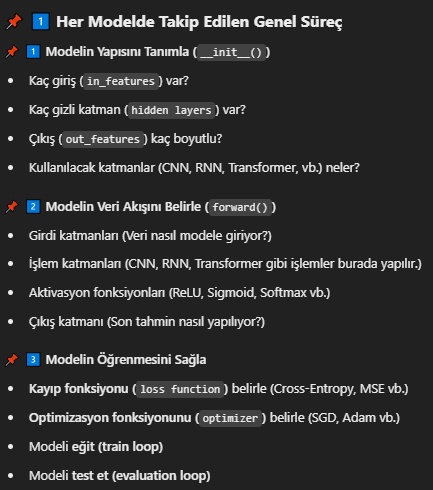

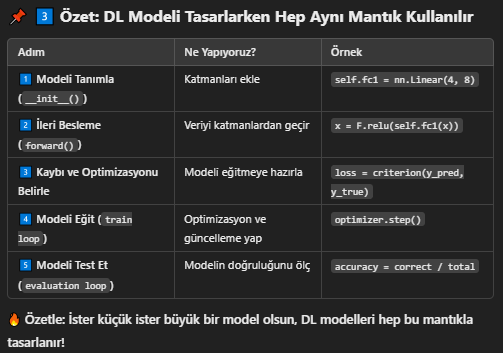

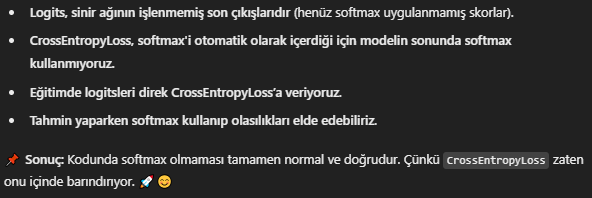

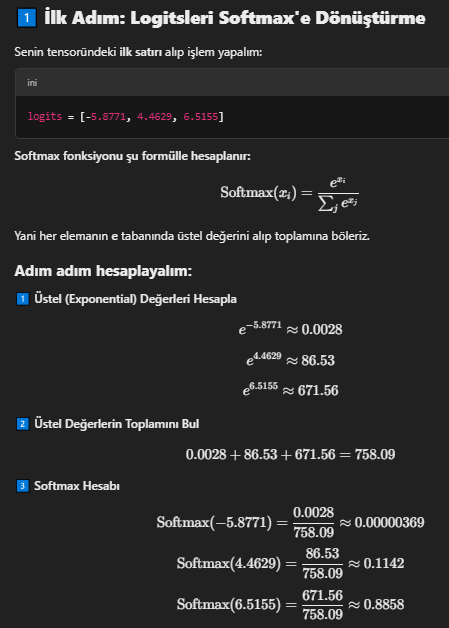

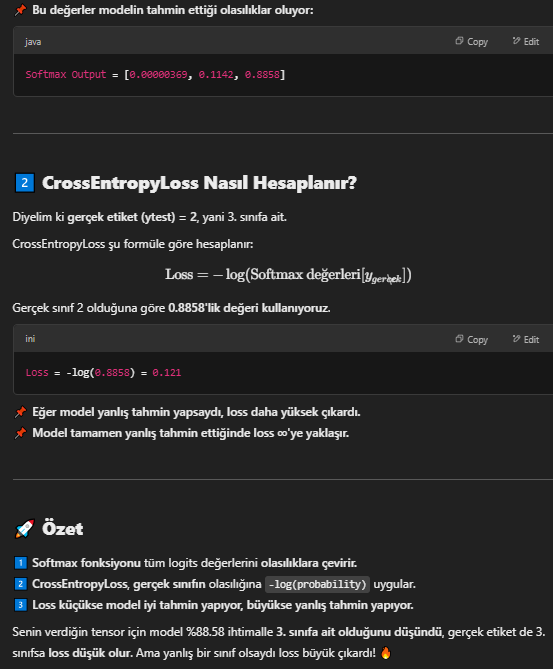

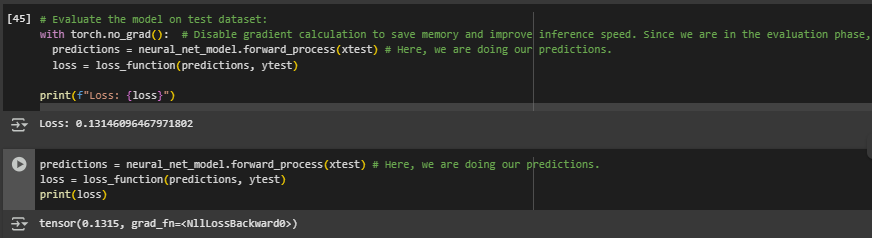

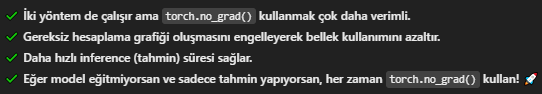

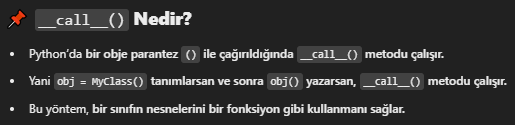

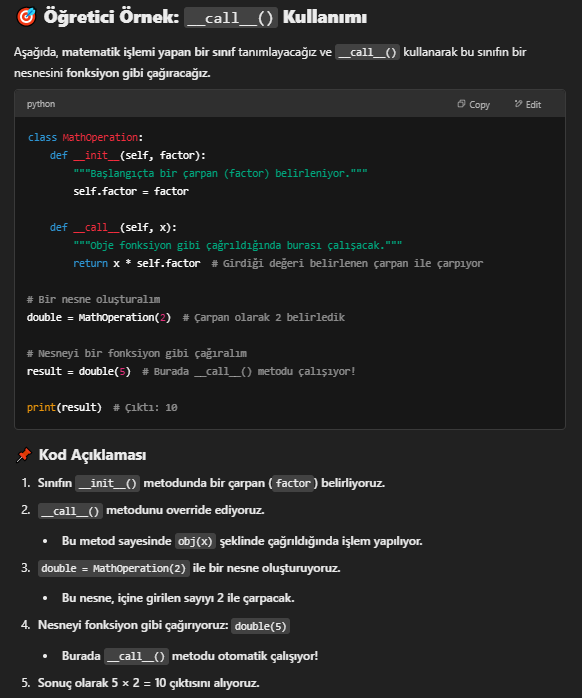

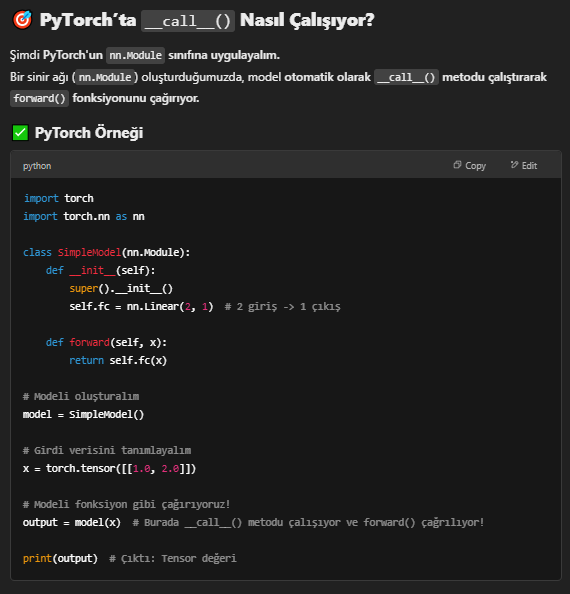

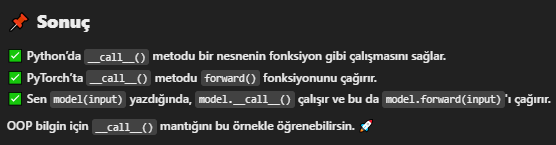

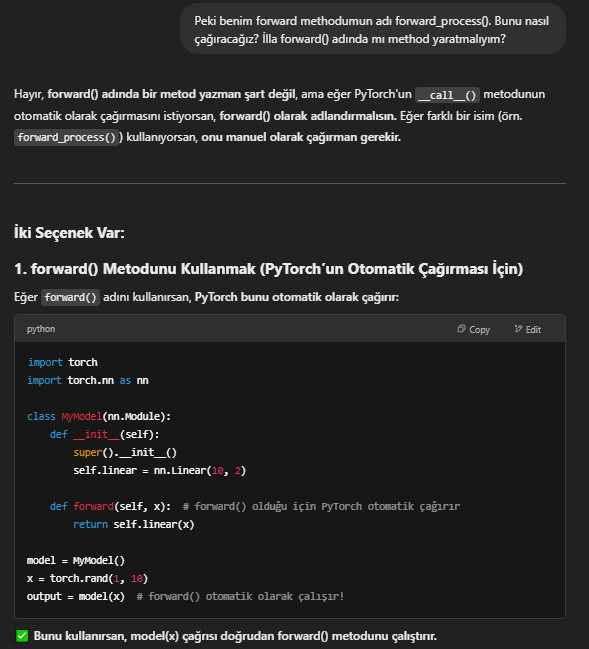

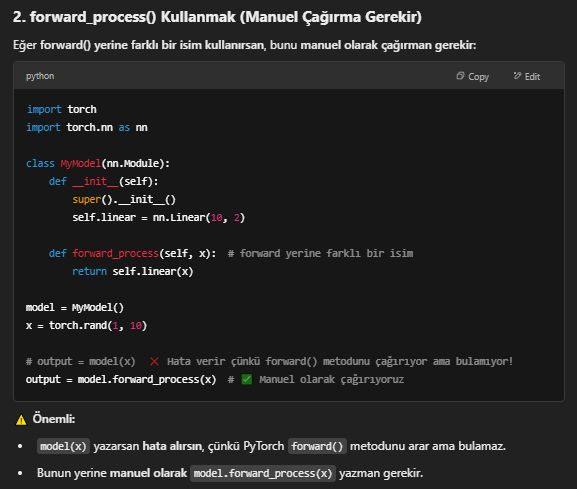

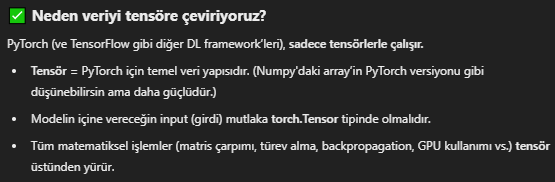

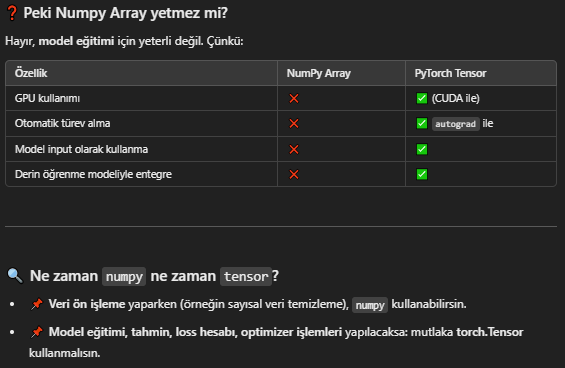

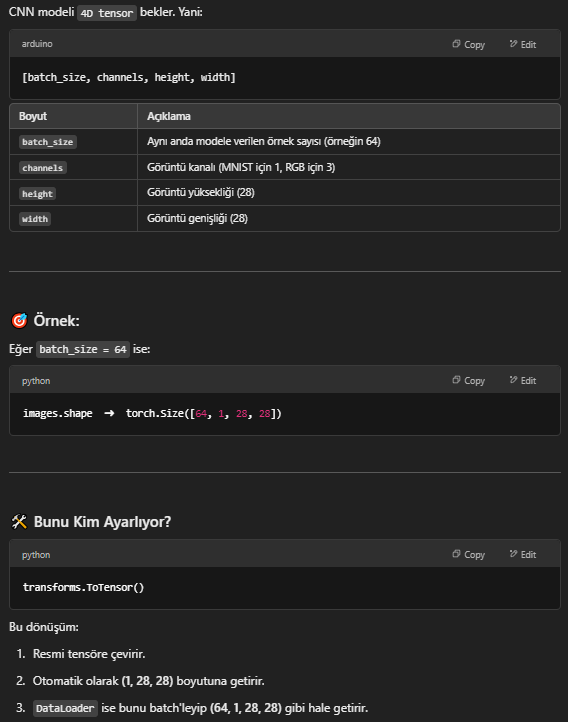

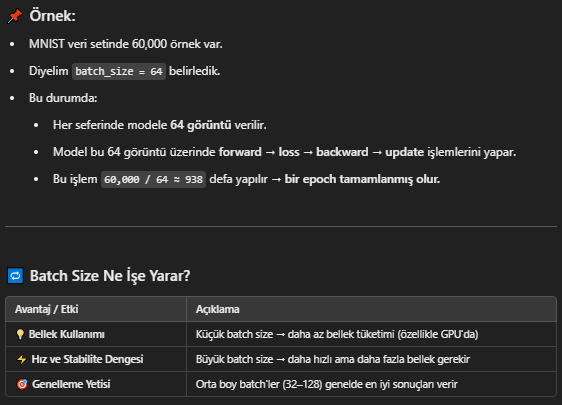

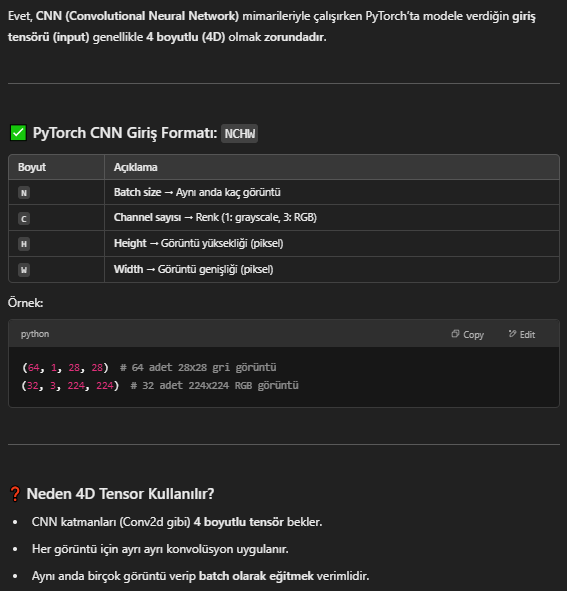

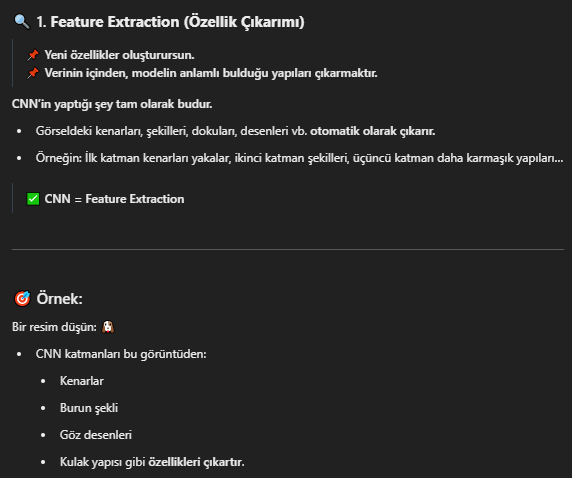

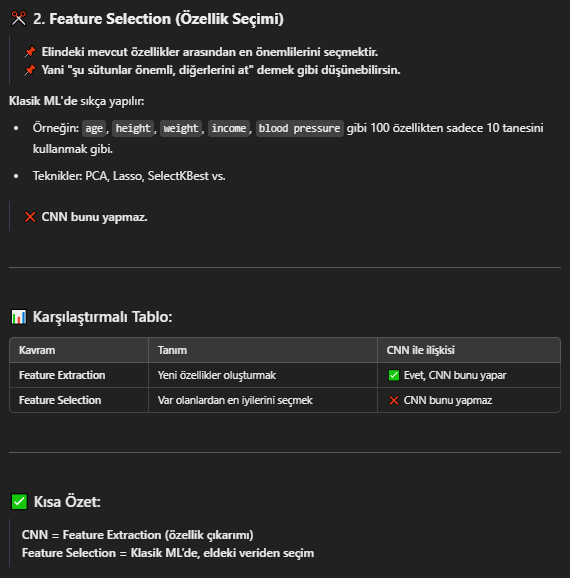

Elbette! Aşağıda PyTorch ile bir derin öğrenme modelinin sıfırdan tahmin aşamasına kadar olan tüm süreci adım adım, kronolojik ve açıklamalı şekilde veriyorum. Bu, tam anlamıyla bir proje şablonu gibi düşünebilirsin:



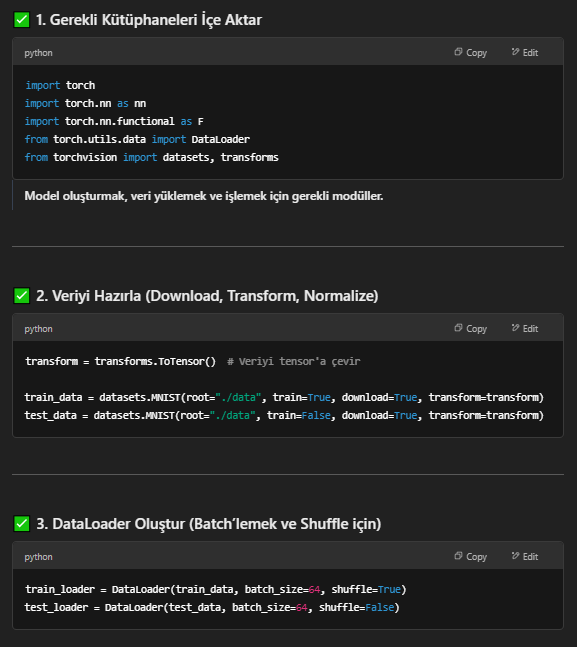

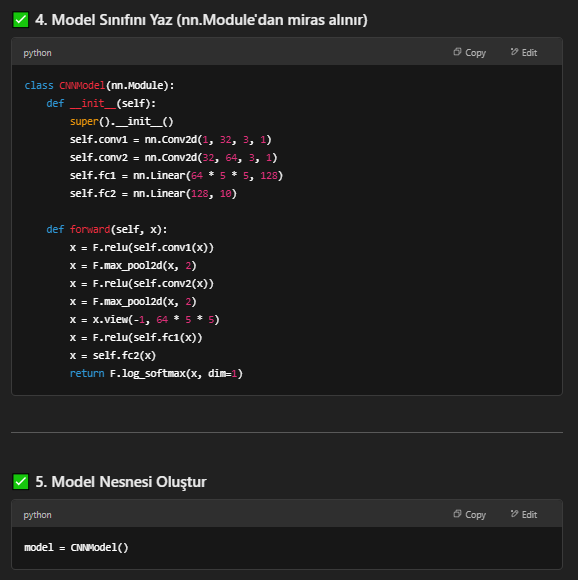

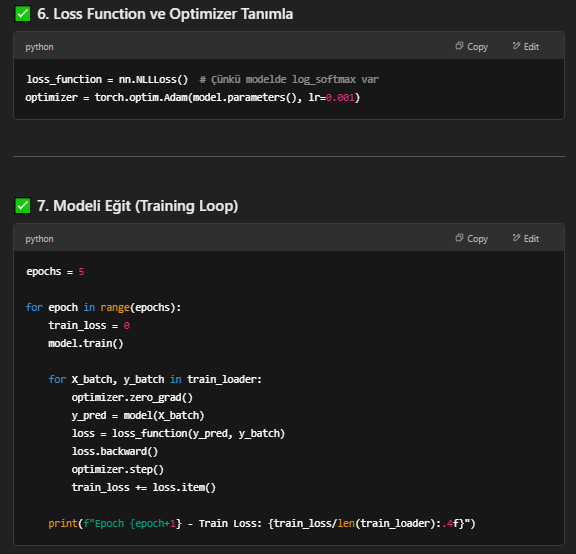

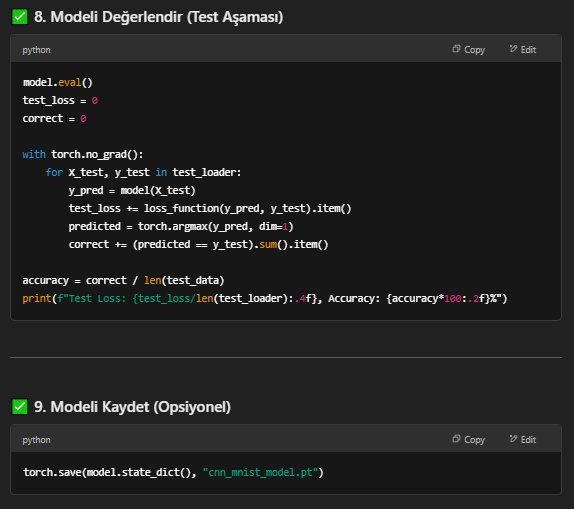

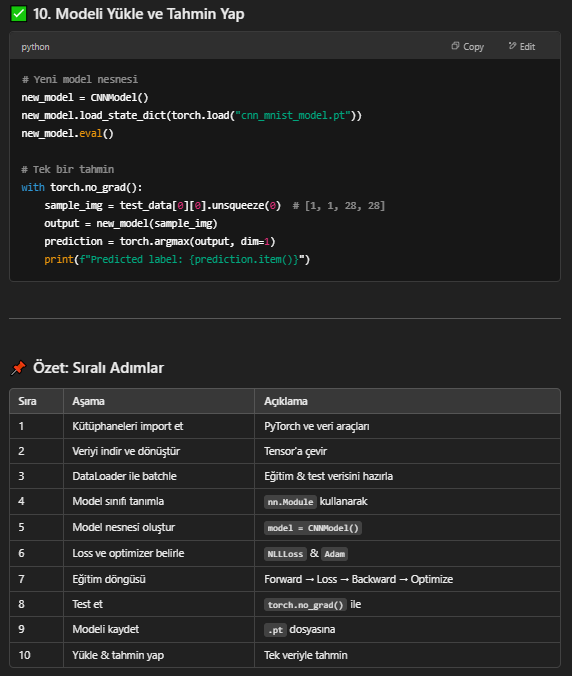

# Create an Neural Nework Model with Pytorch

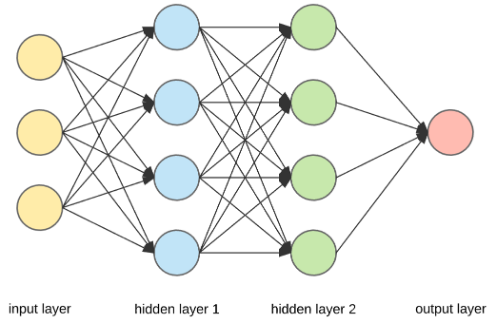

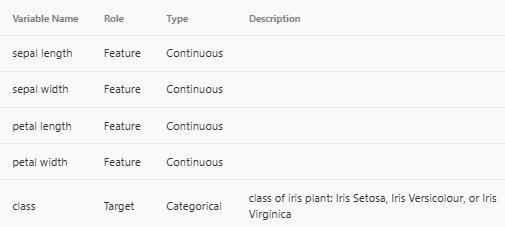

Some part of the dataset:

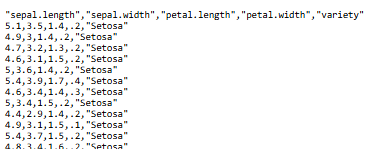

In [26]:
import torch
import torch.nn as nn  # PyTorch’ta yapay sinir ağı katmanlarını oluşturmak için kullanılır.
import torch.nn.functional as F   # Aktivasyon fonksiyonları gibi yardımcı fonksiyonları sağlar.
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
# Create a Model Class that inherits nn.Module

# Input layer (4 features of the flower) -->
# Hidden layer1 (number of neurons) -->
# Hidden layer2 (number of neurons) -->
# Output (3 classes of iris flowers)

# Burda yarattığımız Neural_Network_Model class'ı nn.Module'ün tüm özelliklerini ve fonksiyonlarını kullanabiliyor.
# (Inherit ettiğimiz için :))

# nn.Module -> Pytorch'un tüm sinir ağı modellerinin  temilini oluşturan sınıftır.

# Değişenleri class içinde diğer methodlar içinde kullanacaksak self.in_features = in_features vs. şeklinde eşitlemek gerekir.
# Ama biz class içinde bunları direk alıp nn.Linear class'ına input olarak verdiğimiz için eşitlemeyi yapmasak da olur.

# Module içinde __call__() metodu var.
# Bu metod, "forward() varsa onu çağır" diye tanımlı.
# Senin modelinde forward() yoktu ama nn.Linear içinde vardı.
# Bu yüzden self.fc1(x) dediğinde, nn.Linear'in forward() metodu çağrıldı.
# Eğer forward() olmasaydı, hata alırdın.

class Neural_Network_Model(nn.Module):
  def __init__(self, in_features = 4, hidden1 = 8, hidden2 = 9, out_features = 3):
    super().__init__()  # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, hidden1)
    self.fc2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward_process(self, x):
    x = F.relu(self.fc1(x))    # x = F.relu(self.fc1.forward(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [28]:
torch.manual_seed(41) # Random sayılar olacak ama videodaki hocayla aynı sayıları üretecek.

neural_net_model = Neural_Network_Model()  # Create the model

In [29]:
dataset_link = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [30]:
iris_dataset = pd.read_csv(dataset_link)
print(iris_dataset.shape)

(150, 5)


In [31]:
iris_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [32]:
# Change Variety column with numerical values:
iris_dataset = iris_dataset.replace({"variety": {"Setosa": 0.0, "Versicolor": 1.0, "Virginica": 2.0}})
iris_dataset.head(3)

<ipython-input-32-d77079d8e6a5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_dataset = iris_dataset.replace({"variety": {"Setosa": 0.0, "Versicolor": 1.0, "Virginica": 2.0}})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [33]:
# Train Test Split Set x and y:
x = iris_dataset.drop("variety", axis = 1).values   # .values -> for converting dataframe to numpy array
y = iris_dataset["variety"].values

In [34]:
# x

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 41)

In [36]:
# We need them as Tensor not numpy array:
# (We want x values Tensor values as float numbers -> FloatTensor was used)
# (We used LongTensor since we want y values as integer numbers.)
xtrain = torch.FloatTensor(xtrain)
xtest = torch.FloatTensor(xtest)
ytrain = torch.LongTensor(ytrain)
ytest = torch.LongTensor(ytest)

In [37]:
# Defining loss:
loss_function = nn.CrossEntropyLoss()
# Choose Adam optimizer:
optimizer = torch.optim.Adam(neural_net_model.parameters(), lr = 0.01)

In [38]:
# Train our model:
epochs = 100
loss_list = []

for i in range(epochs):
  y_pred = neural_net_model.forward_process(xtrain)
  loss = loss_function(y_pred, ytrain)
  loss_list.append(loss.detach().numpy())  # We are converting our losses from tensors to numpy

  if i % 5 == 0:
    print(f"Epoch: {i} Loss: {loss}")

  # This part is for back propagation Take the error rate of forward propagation and feed it back throuhg
  # the network to fine tune the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.125203251838684
Epoch: 5 Loss: 1.0637890100479126
Epoch: 10 Loss: 1.0097211599349976
Epoch: 15 Loss: 0.9308029413223267
Epoch: 20 Loss: 0.8162347674369812
Epoch: 25 Loss: 0.6905203461647034
Epoch: 30 Loss: 0.585993230342865
Epoch: 35 Loss: 0.48723843693733215
Epoch: 40 Loss: 0.4003389775753021
Epoch: 45 Loss: 0.3279194235801697
Epoch: 50 Loss: 0.26794716715812683
Epoch: 55 Loss: 0.21829897165298462
Epoch: 60 Loss: 0.1796349585056305
Epoch: 65 Loss: 0.147457554936409
Epoch: 70 Loss: 0.12165623158216476
Epoch: 75 Loss: 0.10150646418333054
Epoch: 80 Loss: 0.0860651507973671
Epoch: 85 Loss: 0.07426378130912781
Epoch: 90 Loss: 0.06522614508867264
Epoch: 95 Loss: 0.05828273668885231


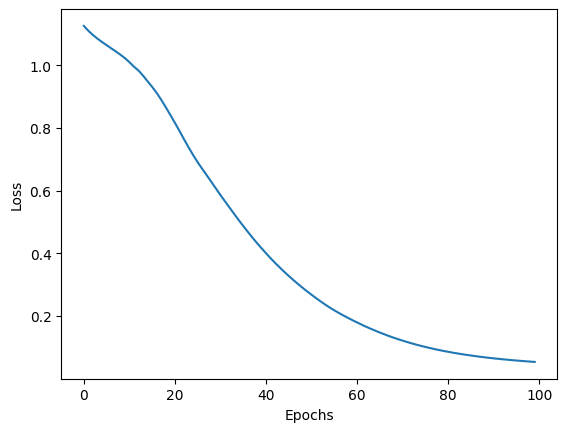

In [39]:
# Graph it out:
type(loss_list)
plt.plot(range(epochs), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [40]:
# Evaluate the model on test dataset:
with torch.no_grad():  # Disable gradient calculation to save memory and improve inference speed. Since we are in the evaluation phase, we do not need to track gradients or perform backpropagation.
  predictions = neural_net_model.forward_process(xtest) # Here, we are doing our predictions.
  loss = loss_function(predictions, ytest)

print(f"Loss: {loss}")

Loss: 0.13146096467971802


In [41]:
print(predictions)

tensor([[-5.8771,  4.4629,  6.5155],
        [-7.5451,  4.1668,  9.7293],
        [-8.4517,  5.1275, 10.2015],
        [-4.3411,  5.6280,  2.5636],
        [-7.1838,  4.8757,  8.3024],
        [-3.3940,  5.3421,  1.2802],
        [-5.9240,  4.9826,  6.0025],
        [-4.2895,  5.7016,  2.3920],
        [-6.5369,  4.9261,  7.1291],
        [-8.0526,  4.4129, 10.3325],
        [-5.6775,  4.9505,  5.6248],
        [ 4.5748, -2.2579, -2.8925],
        [ 4.2646, -2.0055, -2.7342],
        [-2.1081,  4.0482,  0.5803],
        [ 3.4608, -1.2147, -2.3488],
        [-5.4739,  5.1174,  5.0966],
        [ 4.0637, -1.8045, -2.6504],
        [-5.8090,  4.6057,  6.2494],
        [ 4.9250, -2.5763, -3.0545],
        [ 3.4559, -1.2559, -2.3637],
        [-2.6161,  4.5584,  0.8575],
        [-7.7427,  4.7379,  9.4233],
        [ 3.5776, -1.3269, -2.4109],
        [ 4.5445, -2.2478, -2.8698],
        [-2.6548,  4.6138,  0.8825],
        [-3.2832,  5.2189,  1.2163],
        [-4.6527,  5.7790,  2.9302],
 

In [42]:
print(ytest)

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])


In [43]:
new_iris = torch.FloatTensor([[5.9, 3.0, 5.1, 1.8]])

In [44]:
with torch.no_grad():
  pred = neural_net_model.forward_process(new_iris)
  loss_ = loss_function(pred, torch.LongTensor([2]))
print(loss_)

tensor(0.1076)


In [45]:
print(pred)

tensor([[-5.9960,  4.5080,  6.6831]])


In [46]:
# Save our Neural Network model:
torch.save(neural_net_model.state_dict(), "iris_nn_model.pt") # It saves weights and biases

In [47]:
# Load saved model:
saved_model = Neural_Network_Model()  # Yeni bir model nesnesi oluştur
saved_model.load_state_dict(torch.load("iris_nn_model.pt"))   # Ağırlıkları yükle

<All keys matched successfully>

In [48]:
# Make sure it loaded correctly:
saved_model.eval()

Neural_Network_Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# Create a Convolutional Neural Nework Model with Pytorch

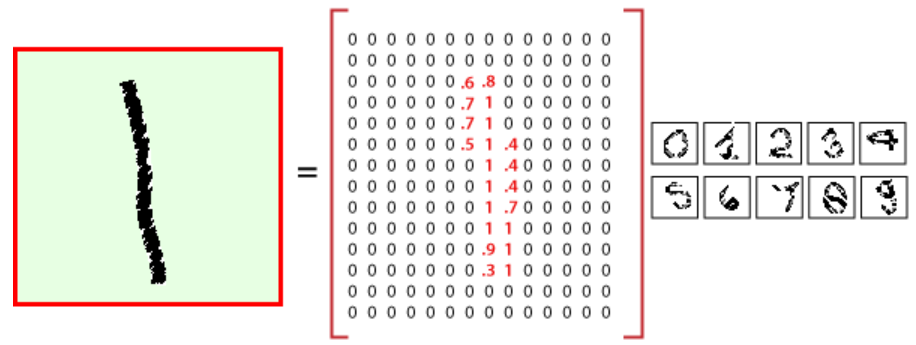

image filter = image kernel

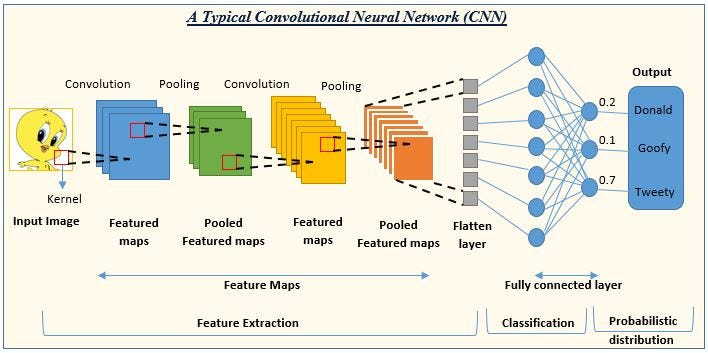

## CNN Terms:

 **1. Kernel (Filter)**
- Tanım: Görüntü üzerinde dolaşan küçük bir matristir (örneğin 3x3). Görevi, görseldeki kenar, köşe gibi özellikleri bulmak.
- Ne yapar? Girdinin üzerine kayarak (convolve ederek) her bölgeden bir sayısal çıktı üretir.
- Örnek: 28x28’lik görüntüye 3x3 kernel uygularsan, daha küçük bir çıktı üretmiş olursun.

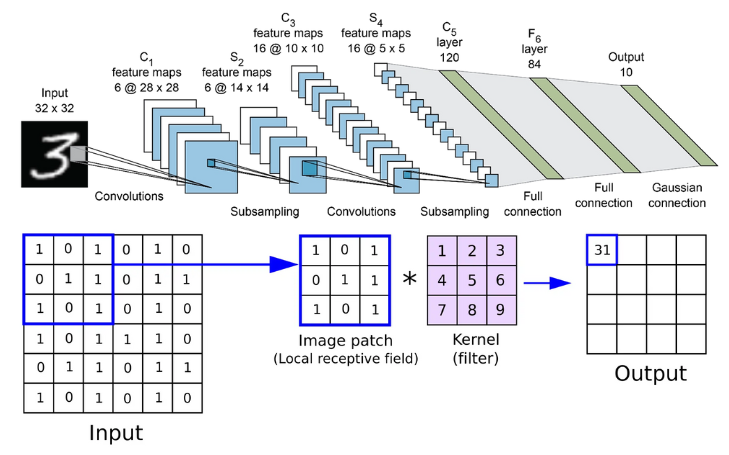

**2. Stride (Adım Boyu)**
- Tanım: Kernel’in görüntü üzerinde bir adımda kaç piksel kayacağını belirleyen parametre.
- Stride=1: Kernel her seferinde 1 piksel kayar.
- Stride=2: Kernel her seferinde 2 piksel kayar, bu da çıktı boyutunu küçültür.

**3. Padding**
- Tanım: Görüntünün kenarlarına sıfırlar (veya başka değerler) ekleyerek kernel'in her yere eşit uygulanmasını sağlar.
- Neden? Kenardaki bilgilerin kaybolmaması için kullanılır.
- Types:
  - "valid": padding yok (çıktı daha küçük)
  - "same": padding var, çıktı girdiyle aynı boyutta kalır

**4. Feature Map (Öznitelik Haritası)**
- Tanım: Kernel’in görüntü üzerinden kayarak oluşturduğu çıktı matrisidir. Her kernel bir feature map üretir.
- Ne içerir? Görselin belirli bir özelliğine (kenar, çizgi) duyarlı bilgi.

**5. Pooling**
- Tanım: Feature map’in boyutunu küçültmek için kullanılır.
- En yaygın tür: Max Pooling – 2x2 bölgede en büyük değeri seçer.
- Neden kullanılır?
  - Downsampling (Subsampling)
  - Hesaplama yükünü azaltır.
  - Modelin genel özellikleri öğrenmesini sağlar.
  - Overfitting riskini azaltır.

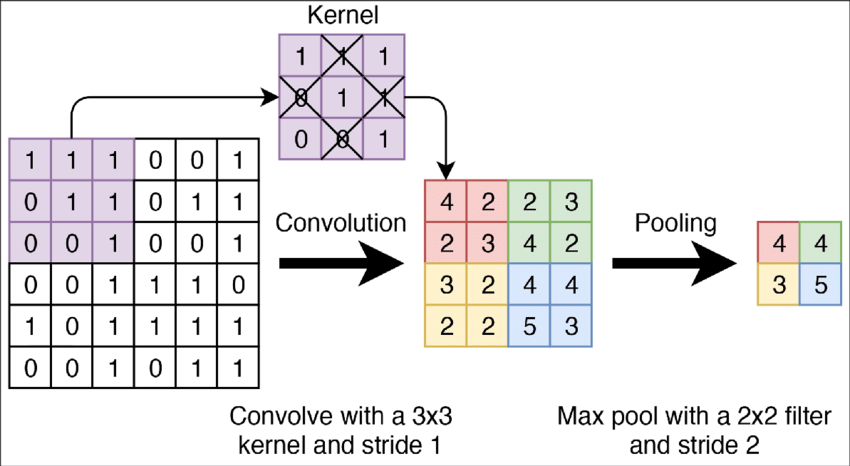


 **6. Flatten**
- Tanım: Çok boyutlu veriyi tek boyutlu hale getirir (vektör).
- Ne zaman? Fully connected (dense) layer’a geçmeden önce.

**7. Fully Connected Layer (Dense Layer)**
- Tanım: CNN katmanlarının sonunda yer alır. Görüntüdeki özniteliklere göre tahmin yapılır.
- Örnek: MNIST için 10 çıktı nöronu = 0–9 rakamları.

**8. ReLU (Activation Function)**
- Tanım: Negatif değerleri sıfıra çevirir, pozitifi aynen bırakır: f(x) = max(0, x)
- Neden? Ağı sinir ağına doğrusal olmayanlık (non-linearity) katar.

**9. Epoch ve Batch Size**
- Epoch: Tüm verinin bir kez modele verilmesidir.
- Batch Size: Her seferde modele verilen veri sayısıdır.

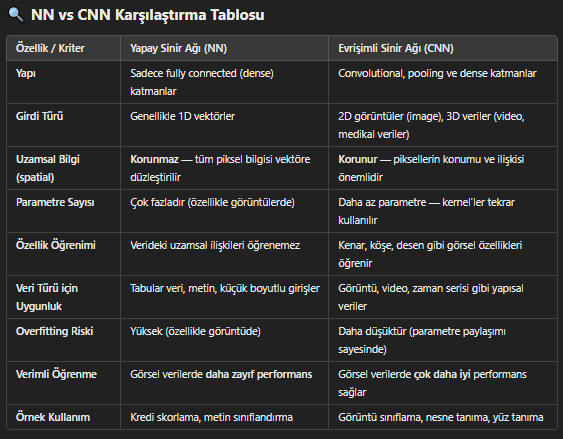

In [49]:
import torch # PyTorch kütüphanesi - tensör işlemleri ve derin öğrenme modelleri için temel yapı
import torch.nn as nn # PyTorch'un sinir ağı (neural network) modülü - layer'lar, loss fonksiyonları vs.
import torch.nn.functional as F # PyTorch içinde tanımlı aktivasyon fonksiyonları gibi işlevsel işlemler
from torch.utils.data import DataLoader # Veriyi mini batch’ler hâlinde yüklememize ve işlemler yapmamıza olanak tanıyan araç
from torchvision import datasets, transforms # torchvision: Görüntü işleme için PyTorch’a özel bir paket. Hazır veri setleri, dönüştürme işlemleri (transform), görselleştirme araçları içerir
from torchvision.utils import make_grid # Görselleri grid (kareler) hâlinde birleştirip görselleştirmeye yarar
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Dataseti okuyoruz:

In [50]:
# Convert MNIST image files into a tensor of 4-Dimensions ([batch_size, # channels, height, width])
# transforms.ToTensor -> resmi tensöre çevirir, otomatik olarak (1, 28, 28) boyutuna getirir. *****
# DataLoader ise bunu batch'leyip (64, 1, 28, 28) gibi hale getirir. *****
# Batch size, her iterasyonda (adımda) moedele verilen örnek sayısıdır.
train_mnist = datasets.MNIST(root = "./cnn_data", train = True, download = True, transform = transforms.ToTensor())
test_mnist = datasets.MNIST(root = "./cnn_data", train = False, download = True, transform = transforms.ToTensor())

In [51]:
print(train_mnist, "\n")
print(test_mnist)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor() 

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [52]:
# Create a small batch size for images, let's say 10.
train_mnist_loader = DataLoader(train_mnist, batch_size = 10, shuffle = True)
test_mnist_loader = DataLoader(test_mnist, batch_size = 10, shuffle = True)

# Veri boyutu her batch’te: torch.Size([10, 1, 28, 28])

Bu kısımda class yapısına hemen geçmeden sadece bir image vererek modelin akışını baitçe anlamaya çalışyoruz:

In [53]:
# Define our CNN model:
# Describe convolutional layer and what it is doing (2 convolutional layers)
# in_channels = Bir görüntünün kaç kanal (renk katmanı) içerdiğidir.
# MNIST: Siyah-beyaz (gri tonlamalı) görüntüler → tek kanal, in_channels = 1
# out_channels = 32: 32 farklı filtre (kernel) uygulanacak → Bu da 32 adet feature map (özellik haritası) üretir.
# kernel_size = 3: Her filtre 3x3 boyutundadır. Bu küçük pencere, görüntü üzerinde kayarak özellikleri çıkarır.
# stride = 1: Filtre görüntü üzerinde her adımda 1 piksel kayar. Yani çok sık tarama yapılır.
conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1)   # Dikkat et, conv2'nin in_channel sayısı bir önceki conv1'in out_channel sayısına eşit oldu.
conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1)

In [54]:
# Grab 1 MNIST image
for i, (X_train, y_train) in enumerate(train_mnist):
    break  # döngü ilk batch'den sonra durduruluyor.

In [55]:
print(X_train.shape)
# print(X_train)
print(y_train)

torch.Size([1, 28, 28])
5


In [56]:
# nn.Conv2d() gibi CNN katmanları 4 boyutlu input bekler. Ama biz tek bir resim aldığımızda boyutu: [1, 28, 28].
# Bu 3D tensordür: 1 channel (gri görüntü), 28*28 boyut. Ama batch size eksik. Kendimiz batch size'ı ekledik:
x = X_train.view(1, 1, 28, 28)

In [57]:
# Perform our first convolution:
x = F.relu(conv1(x))
print(x.shape)  # [1, 32, 26, 26] -> 1: # channels, 32: # feature maps after applying filters, 26*26: image size.

torch.Size([1, 32, 26, 26])


In [58]:
# pass through the pooling layer:
x = F.max_pool2d(x, 2, 2)  # 2: kernel size, 2: stride
print(x.shape)  # [1, 32, 13, 13] -> 13*13: image size. Yani # channels ve # feature maps sayısı aynı kalsı. Pooling uyguladığımız için image boyutu küçüldü (13*13)

torch.Size([1, 32, 13, 13])


In [59]:
# 1) İlk Conv layer’a 1 görüntü (1 kanal) verilir, her biri farklı özellik arayan 32 filtre uygulanır → 32 feature map elde edilir.
# 2) Bu 32 feature map, ikinci Conv layer’a 32-kanallı giriş olarak verilir.
# 3) İkinci Conv layer’da her bir filtre, bu 32 kanal için ayrı ayrı 32 küçük kernel kullanır.
# 4) Her filtre, 32 kanala ait sonuçları toplar → 1 yeni feature map üretir. -> bu bir element-wise sum işlemidir. Ortalama alınmaz, doğrudan toplanıp aktivasyon uygulanır.
# 5) Toplamda 64 filtre varsa, bu işlem 64 kez tekrarlanır → 64 yeni feature map elde edilir.
# 6) Böylece 32 kanal, 64 kanallı yeni bir çıktı haline dönüşür.

# Do our 2nd convolutional layer:
x = F.relu(conv2(x))
print(x.shape)  # [1, 64, 11, 11] -> 11*11: image size.

torch.Size([1, 64, 11, 11])


In [60]:
# Pooling layer:
x = F.max_pool2d(x, 2, 2)
print(x.shape)  # [1, 64, 5, 5] -> 5*5: image size.

torch.Size([1, 64, 5, 5])


Model tasarım kısmı asıl burda başlıyor:

In [61]:
# Model Class
# conv1 -> pool1 -> conv2 -> pool2 -> Flattening -> FC1 -> FC2
class Convolutional_Neural_Network_Model(nn.Module):
    ##### MODELİN TASLAĞI OLUŞTURULUR #####
    def __init__(self):
        super().__init__()
        # Convolution layers:
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1)
        # Fully Connected Layers:
        self.fc1 = nn.Linear(in_features = 64 * 5 * 5, out_features = 128)  # Sonra katmandaki toplam feature sayımız 64, 5, 5'ti. 128'i random verdik, flattening sonrası.
        self.fc2 = nn.Linear(in_features = 128, out_features = 84)
        self.fc3 = nn.Linear(in_features = 84, out_features = 10)  # En son 10 output var, çünkü 10 farklı tahminleme yapılacak.

    ##### VERİLERİN NASIL AKACAĞINI TANIMLAR #####
    def forward(self, X):
        # First pass:
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, kernel_size = 2, stride = 2)

        # Second pass:
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, kernel_size = 2, stride = 2)

        # Flattening:
        X = X.view(-1, 64 * 5 * 5)  # Çok boyutlu (4D) tensörü, 2D tensöre çeviriyor, çünkü fully connected layer sadece 2D bekler: [batch_size, features]. -1: Batch size'ı kendi ayarlasın.

        # Fully Connected Layers:
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim = 1)

In [62]:
# Create an instance of our model:
torch.manual_seed(41) # Videodaki hocayla aynı olması için sonuçların
conv_neural_net_model = Convolutional_Neural_Network_Model()
conv_neural_net_model

Convolutional_Neural_Network_Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [63]:
# Loss function optimizer:
loss_function_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(conv_neural_net_model.parameters(), lr = 0.001)

In [64]:
import time
start_time = time.time() # Eğitim süresini ölçmek için başlangıç zamanını al

epochs = 5 # How many times we are going to train and test the model.
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# DataLoader ile verileri batch’lere ayır (her batch 10 örnek içerecek)
train_mnist_loader = DataLoader(train_mnist, batch_size = 10, shuffle = True)
test_mnist_loader = DataLoader(test_mnist, batch_size = 10, shuffle = True)

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Train
    for batch, (X_train, y_train) in enumerate(train_mnist_loader):
        batch += 1  # Ekranda güzel yazdırmak için batch number'ı 1!den başlatıyoruz.

        # Modeli kullanarak tahmin yap
        y_pred = conv_neural_net_model(X_train)  # y_pred'de tahminler için olasılıksal değerleri tutar.
        #print(f"y_pred, {y_pred}")

        # Tahmin ile gerçek değer arasındaki farkın (loss) hesaplanması.
        loss = loss_function_cnn(y_pred, y_train)

        # En yüksek değere sahip index tahmin edilen sınıftır
        predicted_mnist_number = torch.max(y_pred.data, dim = 1)[1] # dim=1 → satır içinde işlem yap (yani her örnekteki skorlar arasında), values, indices = torch.max(y_pred.data, 1). predicted değerler aslında index değerleri yani hangi sayı tahminlenmiş onu tutar.
        #print(f"Predicted, {predicted_mnist_number}")

        # How many corrects from a specific batch.
        batch_corr = (predicted_mnist_number == y_train).sum()
        train_corr += batch_corr

        # Apply the optimizer:
        optimizer_cnn.zero_grad() # Önce gradient’leri sıfırla
        loss.backward() # Loss üzerinden back propagation yap
        optimizer_cnn.step() # Weight ve bias güncellenmesi

        if batch % 600 == 0:
            print(f"Epoch: {i} | Batch: {batch} | Loss: {loss.item()}")

    train_losses.append(loss)
    train_correct.append(train_corr)

    # Test
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_mnist_loader):
            y_pred = conv_neural_net_model(X_test)
            predicted_mnist_number = torch.max(y_pred.data, 1)[1]
            test_corr += (predicted_mnist_number == y_test).sum()

    loss = loss_function_cnn(y_pred, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)



current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60} minutes!")

Epoch: 0 | Batch: 600 | Loss: 0.25307604670524597
Epoch: 0 | Batch: 1200 | Loss: 0.014708546921610832
Epoch: 0 | Batch: 1800 | Loss: 0.011217725463211536
Epoch: 0 | Batch: 2400 | Loss: 0.05369527265429497
Epoch: 0 | Batch: 3000 | Loss: 0.7331019639968872
Epoch: 0 | Batch: 3600 | Loss: 0.016451723873615265
Epoch: 0 | Batch: 4200 | Loss: 0.001734806806780398
Epoch: 0 | Batch: 4800 | Loss: 0.0006788090104237199
Epoch: 0 | Batch: 5400 | Loss: 0.170975923538208
Epoch: 0 | Batch: 6000 | Loss: 0.06150437146425247
Epoch: 1 | Batch: 600 | Loss: 0.009425142779946327
Epoch: 1 | Batch: 1200 | Loss: 0.0013118692440912127
Epoch: 1 | Batch: 1800 | Loss: 0.0002214268606621772
Epoch: 1 | Batch: 2400 | Loss: 0.000260847999015823
Epoch: 1 | Batch: 3000 | Loss: 0.006622512824833393
Epoch: 1 | Batch: 3600 | Loss: 0.01483801007270813
Epoch: 1 | Batch: 4200 | Loss: 0.0026221368461847305
Epoch: 1 | Batch: 4800 | Loss: 0.00737376743927598
Epoch: 1 | Batch: 5400 | Loss: 0.011963716708123684
Epoch: 1 | Batch: 60

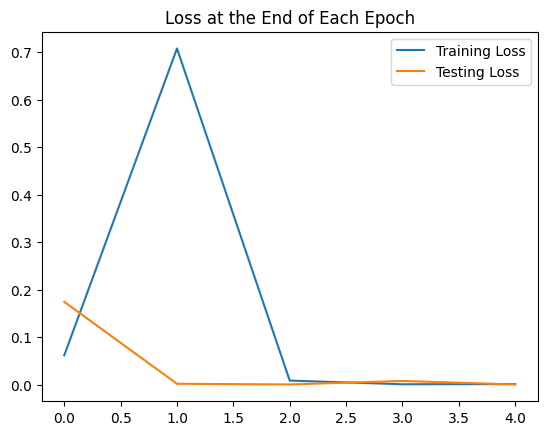

In [65]:
# Graph the loss at each epoch
train_losses = [t.item() for t in train_losses]
test_losses = [t.item() for t in test_losses]
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Testing Loss")
plt.title("Loss at the End of Each Epoch")
plt.legend()

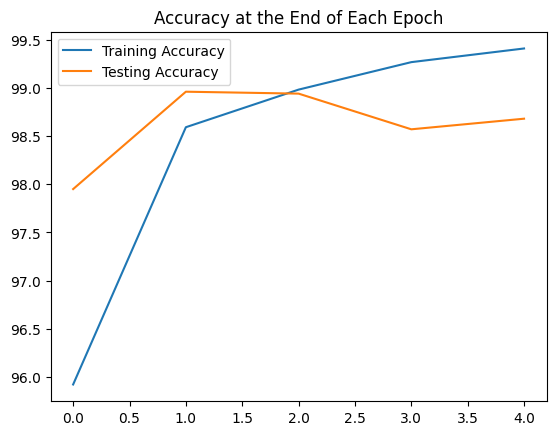

In [66]:
# Graph accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Testing Accuracy")
plt.title("Accuracy at the End of Each Epoch")
plt.legend()
plt.show()

In [70]:
# Let me check the accuracy of our test set
test_load_everything = DataLoader(test_mnist, batch_size = 1000, shuffle = True) # Tüm test dataseı 1 batch'e yükleniyor.
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
        y_pred = conv_neural_net_model(X_test)
        predicted_mnist_number = torch.max(y_pred, 1)[1]
        correct += (predicted_mnist_number == y_test).sum()
print(correct)
print(correct.item())

tensor(9868)
9868


In [68]:
correct.item()/len(test_mnist)*100

98.68

In [73]:
# Choose a random image
test_mnist[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [77]:
# Let me just take the data, without the label
test_mnist[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [78]:
test_mnist[4143][0].shape

torch.Size([1, 28, 28])

In [79]:
test_mnist[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

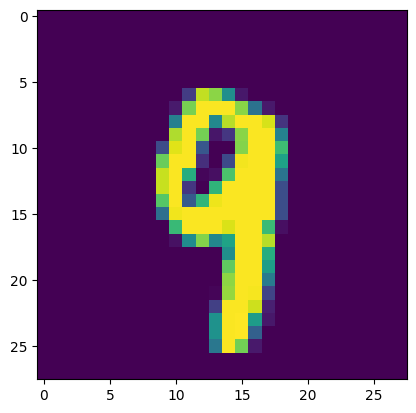

In [84]:
# Show the image
plt.imshow(test_mnist[4143][0].reshape(28,28))
plt.show()

In [91]:
# Let me guess by using our model
conv_neural_net_model.eval()
with torch.no_grad():
  y_pred = conv_neural_net_model(test_mnist[4143][0].view(1,1,28,28))
print(y_pred)

# Which is the max one?
print(torch.argmax(y_pred))
print(torch.argmax(y_pred).item())

tensor([[-1.5161e+01, -1.3518e+01, -1.6296e+01, -1.4674e+01, -7.5358e+00,
         -1.4838e+01, -2.7366e+01, -1.1987e+01, -1.0139e+01, -5.8205e-04]])
tensor(9)
9
